***Introductory Note***:

*Dear Professor,*

*In this project, we have delved into the fascinating mazes of stochastic optimization. Like algorithmic gold miners, we have braved deep valleys and climbed steep peaks of objective functions. We hope that our exploration of this complex and sometimes whimsical realm will entertain you while showcasing our algorithmic acrobatics.*

Best regards, *The "OptimiWizards" Team*



---
# **Libraries**

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
from scipy import integrate
import random
import math

---

# **Algorithms**

---



---
## **1. Sampling Techniques Used**

---

### Gibbs Sampler (From the Study Function)

We employed a Gibbs sampler to generate data in accordance with the study density function. This method iterates through samples (n_samples) using initial values. At each iteration, it uses the current values of x and y to sample new values that satisfy the conditional densities of x and y. The obtained samples are thus generated in accordance with the density function.

The transition chains for our algorithms were built using the Gibbs sampler. Based on the samples generated by this approach, we established transitions between states for our algorithms. Its advantages lie in targeted exploration of the search space, avoiding local traps, converging towards superior-quality solutions, and adapting to complex distributions.

In [ ]:
# Algorithm Parameters
num_iterations = 10000

In [ ]:
def conditional_density_x1_given_x2(f, x1, x2_value, epsilon=1e-8):
    # Définition de la fonction de densité conditionnelle par rapport à x1
    def conditional_density_func(x):
        return f(x, x2_value)

    # Intégration pour obtenir la normalisation
    normalization_constant, _ = integrate.quad(conditional_density_func, -np.inf, np.inf)

    # Calcul de la densité conditionnelle pour x1
    conditional_result = conditional_density_func(x1)

    # Normalisation
    conditional_result /= (normalization_constant + epsilon)  # Normalisation en divisant par la constante de normalisation

    return conditional_result

def conditional_density_x2_given_x1(f, x2, x1_value, epsilon=1e-8):
    # Définition de la fonction de densité conditionnelle par rapport à x2
    def conditional_density_func(y):
        return f(x1_value, y)

    # Intégration pour obtenir la normalisation
    normalization_constant, _ = integrate.quad(conditional_density_func, -np.inf, np.inf)

    # Calcul de la densité conditionnelle pour x2
    conditional_result = conditional_density_func(x2)

    # Normalisation
    conditional_result /= (normalization_constant + epsilon)  # Normalisation en divisant par la constante de normalisation

    return conditional_result



#### *1. Gibbs Sampler with Conditional Densities*

In [ ]:
# Fonction pour simuler les variables avec l'algorithme de Gibbs
def gibbs_sampling(f, iterations):
    samples = [(1, -1)]
    x = samples[-1][0]
    y = samples[-1][1]

    for _ in range(iterations):
        # Étape 1 : Échantillonnage de x1 à partir de la loi conditionnelle sachant x2
        x1_given_x2 = conditional_density_x1_given_x2(f, samples[-1][1], samples[-1][0])
        new_x1 = x1_given_x2 + random.uniform(-10, 10)

        # Étape 2 : Échantillonnage de x2 à partir de la loi conditionnelle sachant x1
        x2_given_x1 = conditional_density_x2_given_x1(f, samples[-1][0], samples[-1][1])
        new_x2 = x2_given_x1 + random.uniform(-10, 10)
        samples.append ((new_x1, new_x2))

    return np.array(samples)



#### *2. Simplified Gibbs Sampler*

In [ ]:
def gibbs_sampler(density_func, n_samples, start_point=(1, 2), n_iter=100):
    samples = []
    x, y = start_point

    for _ in range(n_samples):
        for _ in range(n_iter):
            x = np.random.uniform(-5, 5)
            while np.random.uniform(0, 1) > density_func(x, y):
                x = np.random.uniform(-2, 2)

            y = np.random.uniform(-5, 5)
            while np.random.uniform(0, 1) > density_func(x, y):
                y = np.random.uniform(-2, 2)

        samples.append((x, y))

    return np.array(samples)

### Simple Sampler (From the Test Function)

The method of selecting values for our test function is based on a simple sampler. This selection is based on the need to have a function with a sufficiently complex structure to illustrate the performance and limitations of the algorithms while remaining simple enough to allow clear understanding and in-depth analysis of the results obtained.

In [ ]:
def simple_sampler(density_func, n_samples):
    samples = []
    for _ in range(n_samples):
        x = np.random.uniform(-10, 10)
        y = np.random.uniform(-10, 10)
        if random.uniform(0, 1) > density_func (x, y):
          samples.append((x, y))

    return np.array(samples)

---
## **2. Gradient Descent**

---

In [ ]:
# Paramètres
initial_guess = np.array([1, 2])
learning_rate = 0.1
num_iterations = 1000

In [ ]:
# Fonction gradient approximé
def approximate_gradient(f, x, epsilon=1e-5):
    gradient = np.zeros_like(x)
    for i in range(len(x)):
        x_plus = x.copy()
        x_minus = x.copy()
        x_plus[i] += epsilon
        x_minus[i] -= epsilon
        gradient[i] = (f(x_plus) - f(x_minus)) / (2 * epsilon)
    return gradient.astype(float)

# Algorithme de descente de gradient
def gradient_descent(f, initial_point, learning_rate, num_iterations):
    current_point = initial_point.copy().astype(float)

    for i in range(num_iterations):
        gradient = approximate_gradient(f, current_point)
        current_point -= learning_rate * gradient

    return current_point

# Point de départ pour l'optimisation
initial_guess = np.array([1, 2])

# Paramètres de l'algorithme
learning_rate = 0.1
num_iterations = 1000

---

## **3. Genetic Algorithm**

---

In [ ]:
#Paramètres
population_size = 10
generations = 100000
mutation_rate = 0.05

bounds_energy_balance_density = (-100, 100)
bounds_cross_in_tray = (-10, 10)

min_CIT_gen = {}
min_EBD_gen = {}

In [ ]:
def population_initiale(samples, taille):
  population = [samples[np.random.randint(len(samples))] for _ in range(taille)]
  return population

def evaluation_population(f, population):
  return [f(coord[0], coord[1]) for coord  in population]


def selection(population, evaluation, tournoi_taille=3):
    meilleurs_parents = []
    for _ in range(2): # Sélection de deux parents
        candidats = random.sample(list(zip(population, evaluation)), tournoi_taille)
        # Sélectionner le meilleur candidat (celui avec la plus petite évaluation, car nous minimisons)
        meilleur_candidat = min(candidats, key=lambda x: x[1])
        meilleurs_parents.append(meilleur_candidat[0])
    return meilleurs_parents


def crossover_et_mutatation(bounds, parent1, parent2, mutation_rate):
    #Croisement :  moyenne des positions des parents
    enfant_x = (parent1[0] + parent2[0]) / 2
    enfant_y = (parent1[1] + parent2[1]) / 2
    #Mutation : ajouter une petite perturbation aléatoire
    if random.random() < mutation_rate:
       enfant_x += np.random.normal(bounds[0],bounds[1])
       enfant_y += np.random.normal(bounds[0],bounds[1])

    #Assurez-vous que l'enfant est toujours dans les limites de l'espace de recherche
    enfant_x = max(bounds[0], min(enfant_x, bounds[1]))
    enfant_y = max(bounds[0], min(enfant_y, bounds[1]))

    return enfant_x, enfant_y


def new_population(bounds, population, evaluation, mutation_rate):
    nouvelle_population = []
    while len(nouvelle_population) < len(population):
        parent1, parent2 = selection(population, evaluation)
        enfant1 = crossover_et_mutatation(bounds, parent1, parent2, mutation_rate)
        enfant2 = crossover_et_mutatation(bounds, parent1, parent2, mutation_rate)
        nouvelle_population.append(enfant1)
        nouvelle_population.append(enfant2)

    return nouvelle_population

#Algorithme génétique principal
def genetic_algorithm(f, bounds, taille, samples, generations, mutation_rate):
    population = population_initiale(samples, taille)
    meilleur_individu = None
    meilleur_evaluation = float('inf')

    for _ in range(generations):
        evaluation = evaluation_population(f, population)
        population = new_population(bounds, population, evaluation, mutation_rate)

        #Mise à jour du meilleur individu
        current_meilleur_evaluation = min(evaluation)
        if current_meilleur_evaluation < meilleur_evaluation:
            meilleur_evaluation = current_meilleur_evaluation
            meilleur_individu = population[evaluation.index(current_meilleur_evaluation)]

    return meilleur_individu,  f(meilleur_individu[0], meilleur_individu[1])

---

## **4. Simulated Annealing**

---

In [ ]:
# Algorithme de recuit simulé avec améliorations
def simulated_annealing(f, bounds, samples, max_steps=50000):
    x , y = samples[np.random.randint(0, len(samples))]
    best_x, best_y = x, y
    best_value = f(x, y)

    for step in range(1, max_steps + 1):
        # Fonction logarithmique pour une décroissance plus lente
        temp_factor =  np.power(step, 1/100)
        #temp_factor = 1 / math.log(step + 2)

        indice = np.random.randint(0, len(samples))
        new_x = samples[indice][0] * temp_factor
        new_y = samples[indice][1] * temp_factor

        # S'assurer que la nouvelle solution reste dans les bornes
        new_x = max(bounds[0], min(bounds[1], new_x))
        new_y = max(bounds[0], min(bounds[1], new_y))

        new_value = f(new_x, new_y)
        value_difference = new_value - best_value

        if value_difference < 0 or random.random() < math.exp(-value_difference * temp_factor):
            x, y = new_x, new_y
            if new_value < best_value:
                best_x, best_y = new_x, new_y
                best_value = new_value


    return best_x, best_y, best_value

---

## **5. Heuristic Algorithm**

---

In [ ]:
#Paramètres
bounds_cross_in_tray = (-10, 10)
bounds_energy_balance_density = (-100, 100)
iterations = 10000
minimums = {}

In [ ]:
def minimisation(f, bounds, samples, iterations):
    x , y =  samples[np.random.randint(0, len(samples))]
    best_x, best_y = x, y
    best_evaluation = f(x, y)

    for _ in range(iterations):
        new_x, new_y = samples[np.random.randint(0, len(samples))]

        evaluation_x = f(new_x, y)
        evaluation_y = f(x, new_y)

        if evaluation_x < best_evaluation:
            best_evaluation, x = evaluation_x, new_x

        if evaluation_y < best_evaluation:
            best_evaluation, y = evaluation_y, new_y

        if best_evaluation < f(best_x, best_y):
            best_x, best_y = x, y

    return best_x, best_y, best_evaluation

---

# **Initial Evaluation with a Test Function: Cross in Tray**

---

We have identified relevant test functions for stochastic optimization to initially test the algorithms we have implemented ourselves before applying them to our main function and evaluating their behaviors. We have chosen the "Cross-in-Tray" function, selected for its complexity and multimodal nature. It provides a substantial challenge while remaining accessible for comparison with other studies.

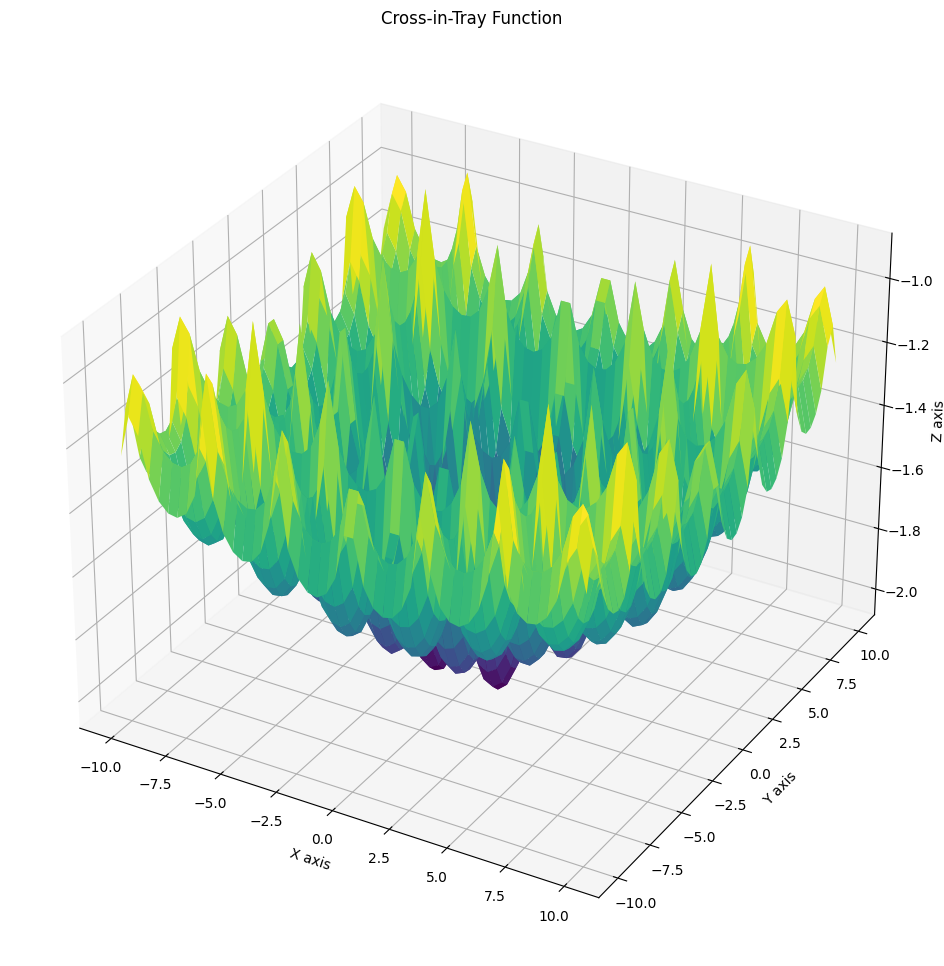

In [ ]:
def cross_in_tray_function(x, y):
    term1 = np.sin(x) * np.sin(y)
    term2 = np.exp(abs(100 - np.sqrt(x**2 + y**2) / np.pi))
    return -0.0001 * (abs(term1 * term2) + 1)**0.1

x = np.linspace(-10, 10)
y = np.linspace(-10, 10)
x, y = np.meshgrid(x, y)
z = cross_in_tray_function(x, y)

fig = plt.figure(figsize=(20, 12))  # Taille de la figure en pouces
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Cross-in-Tray Function')
plt.show()

### *Retrieving Samples from the Cross-in-Tray Function*

In [ ]:
samples_cross_in_tray_function = simple_sampler(cross_in_tray_function, n_samples = 100000)

## ***1. Cross-in-Tray and Gradient Descent***

In [ ]:
def cross_in_tray_function_1V (params):
  x1, x2 = params
  return cross_in_tray_function(x1, x2)

# Optimisation de la fonction avec descente de gradient
result_CIT = gradient_descent(cross_in_tray_function_1V, initial_guess, learning_rate, num_iterations)

# Affichage du résultat de l'optimisation
print("Résultat de l'optimisation :")
print("Valeur optimale de x:", result_CIT)
print("Valeur de la fonction à l'optimum:", cross_in_tray_function_1V(result_CIT))

Résultat de l'optimisation :
Valeur optimale de x: [1.34940662 1.34940662]
Valeur de la fonction à l'optimum: -2.0626118708227374


## ***2. Cross-in-Tray and Genetic Algorithm***

In [ ]:
for _ in range(5):
    meilleur,min_evaluation = genetic_algorithm(cross_in_tray_function, bounds_cross_in_tray,population_size, samples_cross_in_tray_function, generations, mutation_rate)
    min_CIT_gen[meilleur]=min_evaluation

arg = min(min_CIT_gen, key=min_CIT_gen.get)

print("Algorithme génétique")
print("Coordonnées optimales (x, y) : ", arg)
print("Valeur minimale de la fonction : ", min_CIT_gen[arg])

Algorithme génétique
Coordonnées optimales (x, y) :  (-1.3598885614193703, -1.3389831894476383)
Valeur minimale de la fonction :  -2.062584434335282


## ***3. Cross-in-Tray and Simulated Annealing***

In [ ]:
# Exécution de l'algorithme avec plusieurs démarrages aléatoires
bounds_cross_in_tray = (-10, 10)
max_steps = 10000

min_CIT_RC = {}

for i in range(5):
  min_x, min_y, min_evaluation = simulated_annealing(cross_in_tray_function, bounds_cross_in_tray,samples_cross_in_tray_function ,  max_steps)
  min_CIT_RC[(min_x, min_y)]=min_evaluation

arg = min(min_CIT_RC, key=min_CIT_RC.get)

print("Récuit simulé")
print("Coordonnées optimales (x, y) : ", arg)
print("Valeur minimale de la fonction : ", min_CIT_RC[arg])

Récuit simulé
Coordonnées optimales (x, y) :  (1.3675198239424293, 1.3606049744085496)
Valeur minimale de la fonction :  -2.0625624432977303


## ***4. Cross-in-Tray and Heuristic Algorithm***

In [ ]:
min_CIT_AH = {}
for i in range(10):
  min_x, min_y, min_evaluation = minimisation(cross_in_tray_function, bounds_cross_in_tray, samples_cross_in_tray_function, iterations)
  min_CIT_AH[(min_x, min_y)]=min_evaluation

arg = min(min_CIT_AH, key=min_CIT_AH.get)

print("Algorithme heuristique")
print("Coordonnées optimales (x, y) : ", arg)
print("Valeur minimale de la fonction : ", min_CIT_AH[arg])

Algorithme heuristique
Coordonnées optimales (x, y) :  (-1.3493828333410196, -1.3495811005394582)
Valeur minimale de la fonction :  -2.06261186712463


The implemented algorithms accurately yield the minimum values of the Cross-in-Tray function, except for the genetic algorithm, which did not find the best optimum. We will continue the work concretely with our base function.

---
# **Evaluation with the Chosen Function: Energy_Balance**

---

The Energy_Balance(x1, x2) function represents an energy balance with specific characteristics. Its initial, non-normalized form is an expression that integrates trigonometric and polynomial terms based on the variables $x1$ and $x2$. This function reflects an energy balance weighted by trigonometric and exponential values, thus expressing a balance between different energy forces or interactions.

Subsequently, normalizing this function, Energy_Balance_density, adapts it to represent a probability density, highlighting the relative probabilities of different energy configurations in the space (x1, x2).

This normalized density provides an indication of the probability of finding a system in a particular energy state, thus offering valuable insights into the domain of energy balance and physical interactions. Its expression is as follows:

$
\text{Energy_Balance_density} = c \cdot \text{Energy_Balance}(x_1, x_2)
$

with the normalization constant given by:

$\ c = \frac{1}{{\iint_{\mathbb{R}^2} \left(0.5 + \frac{\cos^2(\sin(|x_1^2 - x_2^2|)) - 0.5}{(1 + 0.001 \cdot (x_1^2 + x_2^2)^2)^2}\right) \ dx_1 \, dx_2}} \approx 10 \$



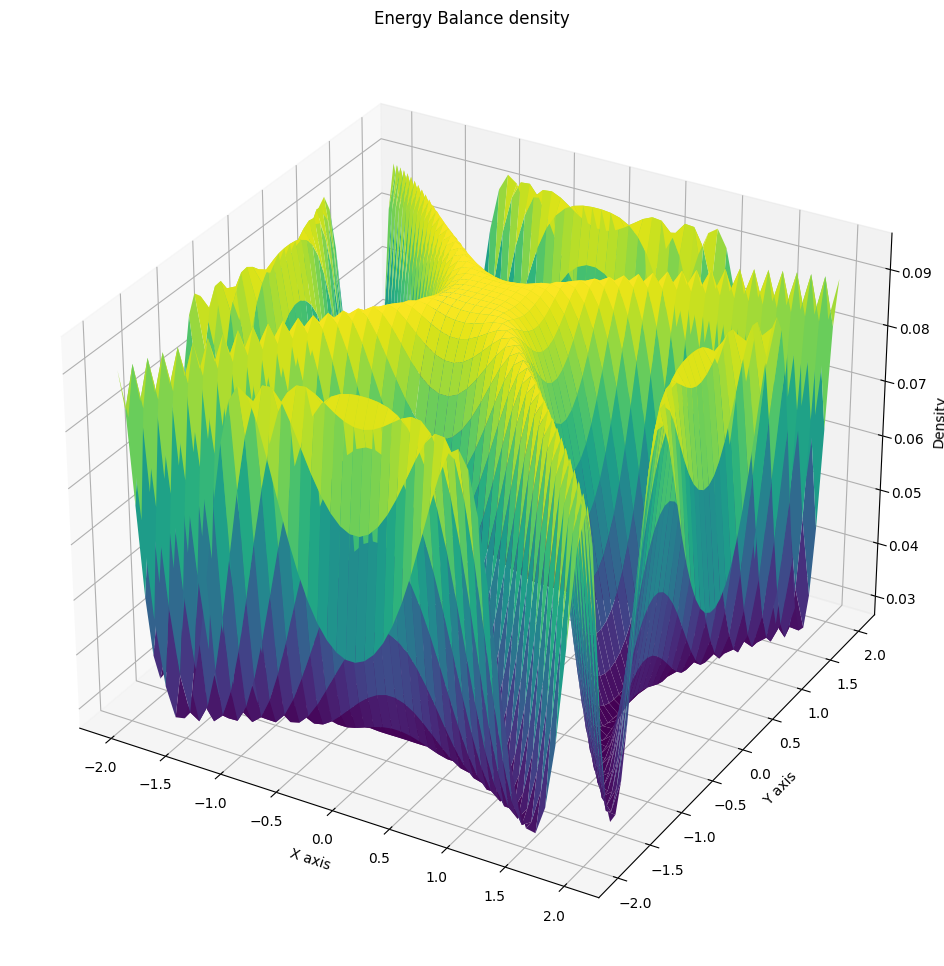

In [ ]:
from scipy.integrate import quad

def Energy_Balance(x1, x2):
    return 0.5 + (((np.cos(np.sin(np.abs(x1**2 - x2**2))))**2 - 0.5) / (1 + 0.001 * (x1**2 + x2**2)**2)**2)


# Définir les limites d'intégration pour x1 et x2
x1_lower, x1_upper = -2, 2
x2_lower, x2_upper = -2, 2

# Calculer l'intégrale de la densité de fonction
integral, _ = quad(lambda x1: quad(lambda x2: Energy_Balance(x1, x2), x2_lower, x2_upper)[0], x1_lower, x1_upper)


def Energy_Balance_density(x1, x2):
    return Energy_Balance(x1, x2) / integral

# Générer des valeurs x et y pour simuler la densité de fonction
x = np.linspace(-2, 2)
y = np.linspace(-2, 2)
X, Y = np.meshgrid(x, y)
Z = Energy_Balance_density(X, Y)

# Représentation 3D de la densité de fonction
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Density')
ax.set_title('Energy Balance density')

plt.show()

## **1. Retrieving Samples Using the Gibbs Sampler**

In [ ]:
n_samples=1000000

*One of the two Gibbs samplers has been selected from the following. Note that each of the two samplers gives substantially similar results.*

In [ ]:
samples_Energy_Balance_density = gibbs_sampling (Energy_Balance_density, n_samples)

### *Uploading to a CSV File*

In [ ]:
import csv
with open('samples_Energy_Balance_density.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['x1', 'x2'])  # Écriture de l'en-tête du fichier CSV
    writer.writerows(samples_Energy_Balance_density)

print("Les échantillons ont été enregistrés dans le fichier 'samples_Energy_Balance_density.csv'.")

Les échantillons ont été enregistrés dans le fichier 'samples_Energy_Balance_density.csv'.


## **2. Presentation of Results Obtained with the Sampler**

### *Retrieving Samples Stored in the CSV File*

In [ ]:
import pandas as pd

# Lecture des échantillons à partir du fichier CSV dans un DataFrame
df = pd.read_csv('samples_Energy_Balance_density.csv')

imported_samples = df.to_numpy()

print("Échantillons importés à partir du fichier CSV :")
print(imported_samples)


Échantillons importés à partir du fichier CSV :
[[-1.67615465  3.86488477]
 [-0.4343318   0.15955391]
 [ 1.39613392  1.22466034]
 ...
 [-0.30769743  0.35864434]
 [-0.81621662 -1.22974967]
 [ 1.59747354  1.17762831]]


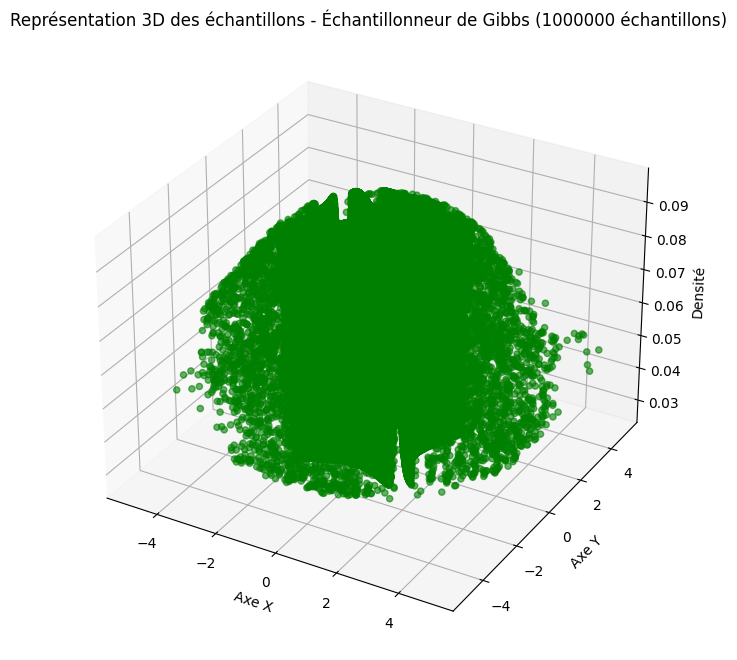

In [ ]:
# Représentation 3D des échantillons

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x_samples, y_samples = imported_samples[:, 0], imported_samples[:, 1]
z_samples = Energy_Balance_density(x_samples, y_samples)

ax.scatter(x_samples, y_samples, z_samples, color='g', alpha=0.6)

ax.set_xlabel('Axe X')
ax.set_ylabel('Axe Y')
ax.set_zlabel('Densité')
ax.set_title(f'Représentation 3D des échantillons - Échantillonneur de Gibbs ({n_samples} échantillons)')

plt.show()

**Commentary on the graphical result obtained through the simulation**: *The samples obtained demonstrate a satisfactory convergence towards the desired distribution, thus illustrating a successful simulation of the law. The results obtained through the Gibbs sampler show good alignment with the target density function.*

### *Verification of the Normalization of the Density Function*

In [ ]:
# Définir les limites d'intégration pour x1 et x2
x1_lower, x1_upper = -2, 2
x2_lower, x2_upper = -2, 2

# Calculer l'intégrale de la densité de fonction
inegral, _ = quad(lambda x1: quad(lambda x2: Energy_Balance_density(x1, x2), x2_lower, x2_upper)[0], x1_lower, x1_upper)

print("Intégrale de la densité de fonction:", inegral)


Intégrale de la densité de fonction: 0.999999999999955


## **3. Energy_Balance_density and Gradient Descent**

In [ ]:
def Energy_Balance_density_1V(params):
  x1, x2 = params
  return Energy_Balance_density(x1, x2)

# Point de départ pour l'optimisation
initial_guess = np.array([1, 2])

# Paramètres de l'algorithme
learning_rate = 0.1
num_iterations = 100000

# Optimisation de la fonction avec descente de gradient
result = gradient_descent(Energy_Balance_density_1V, initial_guess, learning_rate, num_iterations)

# Affichage du résultat de l'optimisation
print("Résultat de l'optimisation :")
print("Valeur optimale de x:", result)
print("Valeur de la fonction à l'optimum:", Energy_Balance_density_1V(result))


Résultat de l'optimisation :
Valeur optimale de x: [0.00626773 1.25275803]
Valeur de la fonction à l'optimum: 0.027837456472107117


## **4. Energy_Balance_density and Heuristic Algorithm**

In [ ]:
min_EBD_AH = {}
for i in range(5):
  min_x, min_y, min_evaluation = minimisation(Energy_Balance_density, bounds_energy_balance_density,samples_Energy_Balance_density, iterations)
  min_EBD_AH[(min_x, min_y)]=min_evaluation

arg = min(min_EBD_AH, key=min_EBD_AH.get)

print("Algorithme heuristique")
print("Coordonnées optimales (x, y) : ", arg)
print("Valeur minimale de la fonction : ", min_EBD_AH[arg])

Algorithme heuristique
Coordonnées optimales (x, y) :  (1.3110725837701342, 0.38036575293742736)
Valeur minimale de la fonction :  0.027877454128097064


## **5. Energy_Balance_density and Simulated Annealing**

In [ ]:
iterations = 100000
min_EBD_RC = {}

for _ in range(5):
  min_x, min_y, min_evaluation= simulated_annealing(Energy_Balance_density, bounds_energy_balance_density, samples_Energy_Balance_density, iterations)
  min_EBD_RC[(min_x, min_y)]=min_evaluation

arg = min(min_EBD_RC, key=min_EBD_RC.get)

print("Récuit simulé")
print("Coordonnées optimales (x, y) : ", arg)
print("Valeur minimale de la fonction : ", min_EBD_RC[arg])

Récuit simulé
Coordonnées optimales (x, y) :  (-1.4905289674569489, 0.8084335677834746)
Valeur minimale de la fonction :  0.028063533596353604


## **6. Energy_Balance_density and Genetic Algorithm**


In [ ]:
#Exécution de l'algorithme génétique avec plusieurs démarages alétoires

for _ in range(5):
    meilleur,min_evaluation = genetic_algorithm(Energy_Balance_density, bounds_energy_balance_density,population_size, samples_Energy_Balance_density, generations, mutation_rate)
    min_EBD_gen[meilleur]=min_evaluation

arg = min(min_EBD_gen, key=min_EBD_gen.get)

print("Algorithme génétique")
print("Coordonnées optimales (x, y) : ", arg)
print("Valeur minimale de la fonction : ", min_EBD_gen[arg])

Algorithme génétique
Coordonnées optimales (x, y) :  (0.6598782003722774, 1.384641305044545)
Valeur minimale de la fonction :  0.02829626996369771


# **End of Work**